In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import random as rn

os.environ["PYTHONHASHSEED"]="0"
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

11490434/11490434 [==============================] - 0s 0us/step


## Dataset: Training set, Validation set and Test set
The final goal of a classification algorithm is to correctly classify a previously unseen example. Therefore it is not sufficient to solve an optimization problem on the examples used for training. 

To evaluate this **generalization capability** the input dataset is split into two separate sets:  training set and test set. The training set is often further split in training set and validation set.
- the **training set** is used during training in order to increase the experience of the model. An optimization procedure finds the parameters configuration which minimizes the training error.
- the **validation set** is a collection of examples that are not used for training: being part of the training set, we are allowed to modify the hyper-parameters of the model according to the performance of the algorithm on this set.
- the **test set** is used to measure the actual performance of the model, thus its generalization capability. 

The inference capability on previously unseen examples arises from an assumption about data generating process (i.i.d. assumption): examples in training and test sets are supposed to be independent from each other and identically distributed.


## Capacity, Overfitting, Underfitting
The **capacity** of a model corresponds to its degree of complexity: higher the capacity (to a first approximation, the number of parameters), wider the variety of functions it will be able to fit.

If the model is given a low capacity, the error on the training set will be high: this situation is called **underfitting**. 

If the model is given a high capacity, it will overfit the training set, losing the capability to generalize well on a test-set. This situation is called **overfitting**. 

![img](https://miro.medium.com/max/1838/1*VK8qt-Vn8A9QIJUmvIgRUQ.png)


## Back to the MNIST example: Reduced training set

We put ourselves in a more challenging situation: we select a random subset of our training set to simulate a low data regime, i.e. few samples for training.

We will evaluate two different models:
- **base model** will overfit the training data
- **regularized model** will try to fight overfitting

In [3]:
# select the subset of the training set
subset_size = 6000
subset_index = np.random.choice(range(len(train_labels)),size = subset_size)
train_images_subset = train_images[subset_index,:]
train_labels_subset = train_labels[subset_index]

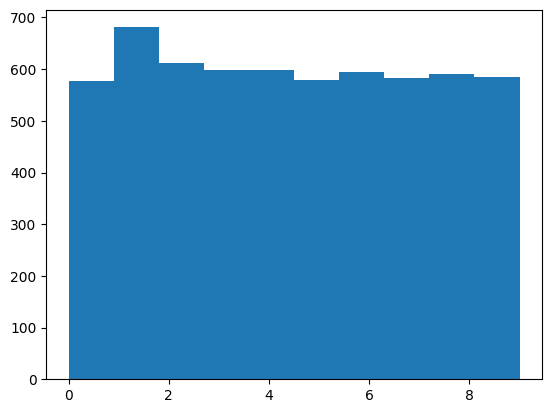

In [4]:
plt.hist(train_labels_subset)
plt.show()

### First model: Base Model

From the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

**validation_split**: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.

In [5]:
batch_size = 128 #how many examples the network exmperiments at every step

In [6]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

from tensorflow.keras import models
from tensorflow.keras import layers

base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))
base_model.summary() 
base_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']) 
history_base = base_model.fit(train_images_subset, 
                              train_labels_subset, 
                              epochs=50, 
                              batch_size=batch_size,
                              validation_split = 0.1, # evaluate the generalization capability of our model 
                              shuffle = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
43/43 [==============================] - 3s 33ms/step - loss: 20.3319 - accuracy: 0.5348 - val_loss: 5.2770 - val_accuracy: 0.7517
Epoch 2/50
43/43 [==============================] - 1s 14ms/step - loss: 3.3722 - accuracy: 0.7939 - val_loss: 3.3875 - val_accuracy: 0.8033
Epoch 3/50
43/43 [===============

In [7]:
base_model_loss, base_model_acc = base_model.evaluate(test_images, test_labels)
print('test_acc:', base_model_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.9445 - accuracy: 0.8596
test_acc: 0.8596000075340271


In [8]:
from tensorflow.keras import backend as K
del base_model
print('model deleted')
K.clear_session()

model deleted


### Second model: Regularized Model

A form of regularization is added to our model: it consists in a modiﬁcation to our learning algorithm that aims at reducing its generalization error but not its training error.

In [9]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

from tensorflow.keras import models
from tensorflow.keras import layers

regularized_model = models.Sequential()
regularized_model.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
regularized_model.add(layers.Dropout(0.1))
regularized_model.add(layers.Dense(64, activation='relu'))
regularized_model.add(layers.Dropout(0.1))
regularized_model.add(layers.Dense(10, activation='softmax'))
regularized_model.summary()

regularized_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

history_regularized = regularized_model.fit(train_images_subset, 
                                            train_labels_subset, 
                                            epochs=50, 
                                            batch_size=batch_size,
                                            validation_split = 0.1,
                                            shuffle = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
43/43 [==============================] - 

In [10]:
print('base model accuracy:', base_model_acc)
test_loss, test_acc = regularized_model.evaluate(test_images, test_labels)
print('regularized model accuracy:', test_acc)

base model accuracy: 0.8596000075340271
313/313 [==============================] - 0s 1ms/step - loss: 0.8278 - accuracy: 0.8982
regularized model accuracy: 0.8981999754905701


In [11]:
del regularized_model
K.clear_session()

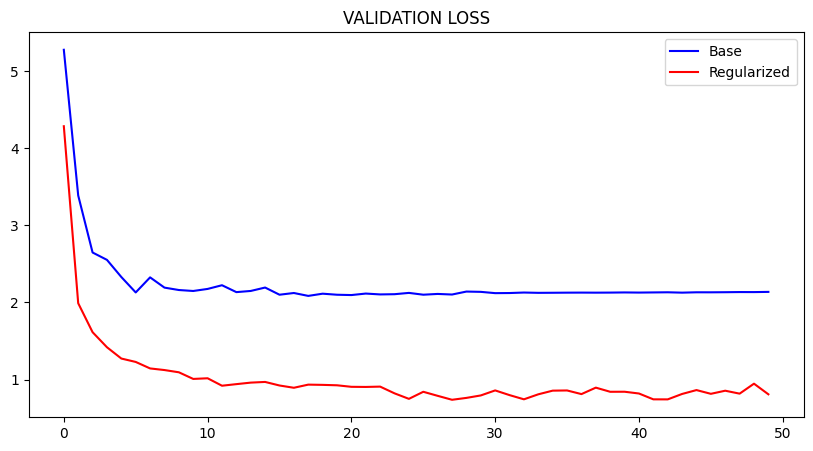

In [12]:
plt.figure(figsize=(10,5))
plt.title('VALIDATION LOSS')
plt.plot(history_base.history['val_loss'],'b-',label = 'Base')
plt.plot(history_regularized.history['val_loss'],'r-',label = 'Regularized')
plt.legend()
plt.show()

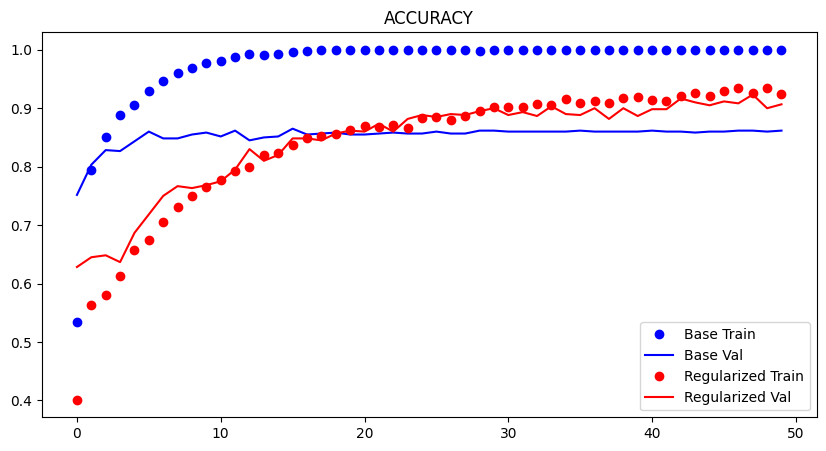

In [13]:
plt.figure(figsize=(10,5))
plt.title('ACCURACY')
plt.plot(history_base.history['accuracy'],'bo',label = 'Base Train ')
plt.plot(history_base.history['val_accuracy'],'b-',label = 'Base Val')
plt.plot(history_regularized.history['accuracy'],'ro',label = 'Regularized Train')
plt.plot(history_regularized.history['val_accuracy'],'r-',label = 'Regularized Val')
plt.legend()
plt.show()

Note that:
- validation loss curve for regularized model shows a slight improvement with respect to the one of base model.
- notwithstanding, validation accuracy for the base model closely trails the one of regularized model. 
- we obtained a better generalization on the test set

Why is the gap between the loss plots not also found in the accuracy plots?


To answer this question, consider that what we display is an average of pointwise loss values, but what actually matters for accuracy is the distribution of the loss values, not their average:  accuracy, in fact, is the result of a thresholding of the class probability predicted by the model. Indeed, the model may still be improving even if this isn't reflected in the average loss.

In [14]:
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 1, 0]])

y_pred1 = np.array([[0.9, 0.05, 0.05], [0.5, 0.45, 0.05], [0.1, 0.4, 0.5]])
y_pred2 = np.array([[0.6, 0.2, 0.2], [0.2, 0.6, 0.2], [0.5, 0.4, 0.1]])

cce = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.Accuracy()

acc.update_state(np.argmax(y_true, axis=1), np.argmax(y_pred1, axis=1))

print(f'1) Loss = {cce(y_true, y_pred1).numpy()}, accuracy = {acc.result().numpy()}')

acc.reset_state()
acc.update_state(np.argmax(y_true, axis=1), np.argmax(y_pred2, axis=1))

print(f'2) Loss = {cce(y_true, y_pred2).numpy()}, accuracy = {acc.result().numpy()}')

1) Loss = 0.6067196479165843, accuracy = 0.3333333432674408
2) Loss = 0.6459806598020456, accuracy = 0.6666666865348816


## Fighting Overfitting
The most common ways to prevent overfitting in neural networks are:
- **Getting more training data**: a model trained on more (quality) data will naturally generalize better. Gathering more data may be even more useful than improving the learning algorithm.

- **Performing dataset augmentation**: The restricted size of available databases is one of the central issue in many machine learning applications. Gathering and annotating new data is often a difficult task. A solution, particularly adopted with images, is to introduce several types of transformation or distortion that consist in an artificial dataset augmentation. 

- **Reducing the capacity of the network**: Overfitting is the use of models or procedures that violate [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor) (paraphrasable as: *The simplest solution is most likely the right one*) for example by uselessly including a high number of adjustable parameters, or by using a more complicated approach than the one is ultimately optimal. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the patterns that have a better chance of generalizing well.

- **Adding weight regularization**: this technique consists in forcing the weights of a network to only take small values: it is achieved by adding a parameter norm penalty $\theta(w)$ (associated with having large weights) to the loss function of the network $J(w)$. As a consequentce: $J(w) = J(w)+\lambda\theta(w)$. For example:
  - with *L2 regularization*, the penalty is proportional to the squared value of the weights coefficients
  - with *L1 regularization*, the penalty is proportional to the absolute value of the weights coefficients
  
```python
from tensorflow.keras import layers
from tensorflow.keras import regularizers
layer = layers.Dense(units=64,
                         kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                         bias_regularizer=regularizers.L2(1e-4),
                         activity_regularizer=regularizers.L2(1e-5))
```
- **Adding dropout**: this technique is widely used to reduce overfitting in neural network: when dropout is applied to a layer, at every training step every unit of that layer is kept with probability p, otherwise it is temporarily ignored. During evaluation (i.e. inference on validation or test set) the dropout is turned-off and all the
neurons are kept.  Dropout effect could be seen from two points of view. On one hand, by randomly sampling the neurons to delete at every step, it reduces the co-adaptation phenomenon between neurons; on the other hand, it results in a procedure that trains a variety of different neural networks (i.e. different number of units per layer). These subnetworks are supposed to overfit the training set in different way, so the global network should be able to generalize better.<br>
![dropout](https://static.commonlounge.com/fp/600w/aOLPWvdc8ukd8GTFUhff2RtcA1520492906_kc)
<br>

[Geoffry Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton) - The idea behind dropout: "*I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting.*"
```python
from tensorflow.keras import layers
layer = layers.Dropout(rate)
```



# Exercise

Try to vary the hyperparameter of your model
- number of layers / units per layer
- optimizer learning rate
- dropout rate
- Add L1 or L2 regularization
  - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense  
  - https://www.tensorflow.org/api_docs/python/tf/keras/regularizers


Share your best model with the class!



# Further reading
- Interactive learning with [Tensorflow Playground](https://playground.tensorflow.org)